## Exploring College Graduates Salaries

This is a simple practices to explore college graduates salaries using Plotly. Plotly is one of the popular data virtualization tool in Python. However, I don't have much experience using plotly for data virtualization during my time at the Thinkful bootcamp. Therefore, I will mainly utilize Plotly for the EDA here. 

The data set is obtained from kaggle via below link. 
https://www.kaggle.com/wsj/college-salaries

There are total of three seperate csv files for this data set. I will explore these three data sets individually. 

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.colors as colors
%matplotlib inline

import plotly.offline as py
from plotly.offline import init_notebook_mode, iplot
import plotly.express as px
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as ff

In [3]:
# Input datasets. 
df_degree = pd.read_csv('degrees-that-pay-back.csv')
df_type = pd.read_csv('salaries-by-college-type.csv')
df_region = pd.read_csv('salaries-by-region.csv')

### Salaries by Major Data Set

In [4]:
# First, let's explore the degress vs. salaries data set. 
df_degree.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 8 columns):
Undergraduate Major                                  50 non-null object
Starting Median Salary                               50 non-null object
Mid-Career Median Salary                             50 non-null object
Percent change from Starting to Mid-Career Salary    50 non-null float64
Mid-Career 10th Percentile Salary                    50 non-null object
Mid-Career 25th Percentile Salary                    50 non-null object
Mid-Career 75th Percentile Salary                    50 non-null object
Mid-Career 90th Percentile Salary                    50 non-null object
dtypes: float64(1), object(7)
memory usage: 3.2+ KB


In [5]:
df_degree.head()

,Undergraduate Major,Starting Median Salary,Mid-Career Median Salary,Percent change from Starting to Mid-Career Salary,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary
0,Accounting,"$46,000.00","$77,100.00",67.6,"$42,200.00","$56,100.00","$108,000.00","$152,000.00"
1,Aerospace Engineering,"$57,700.00","$101,000.00",75.0,"$64,300.00","$82,100.00","$127,000.00","$161,000.00"
2,Agriculture,"$42,600.00","$71,900.00",68.8,"$36,300.00","$52,100.00","$96,300.00","$150,000.00"
3,Anthropology,"$36,800.00","$61,500.00",67.1,"$33,800.00","$45,500.00","$89,300.00","$138,000.00"
4,Architecture,"$41,600.00","$76,800.00",84.6,"$50,600.00","$62,200.00","$97,000.00","$136,000.00"


According to above data set information, we need to change some of the data type from object to float because these are salary and they should be numbers instead of objects. Also, we need to remove "$" sign,",", "."from some columns. 
Luckily, there is no null value in this data set, so we don't need to due with null values for this data set. This will conclude our data cleaning process here. 

In [6]:
# Change column name
df_degree.columns = ['major', 'start','midcareer','percent','mid_10','mid_25','mid_75','mid_90']

# Data Cleaning
clean_columns = ['start','midcareer','mid_10','mid_25','mid_75','mid_90']

for column in clean_columns:
    df_degree[column] = df_degree[column].str.replace('$','')
    df_degree[column] = df_degree[column].str.replace(',','')
    df_degree[column] = pd.to_numeric(df_degree[column])

Let's check out some more basic information about this data set, including min, max, mean, median, std, percentiles. We can display these info with a simple df.describe() command, or visualize it with box plot.  

In [7]:
df_degree.describe()

,start,midcareer,percent,mid_10,mid_25,mid_75,mid_90
count,50.000000,50.00000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,44310.000000,74786.00000,69.274000,43408.000000,55988.000000,102138.000000,142766.000000
std,9360.866217,16088.40386,17.909908,12000.779567,13936.951911,20636.789914,27851.249267
min,34000.000000,52000.00000,23.400000,26700.000000,36500.000000,70500.000000,96400.000000
25%,37050.000000,60825.00000,59.125000,34825.000000,44975.000000,83275.000000,124250.000000
50%,40850.000000,72000.00000,67.800000,39400.000000,52450.000000,99400.000000,145500.000000
75%,49875.000000,88750.00000,82.425000,49850.000000,63700.000000,118750.000000,161750.000000
max,74300.000000,107000.00000,103.500000,71900.000000,87300.000000,145000.000000,210000.000000


In [8]:
trace0 = go.Box(
    y = df_degree.start,
    name = 'Starting Career Median Salary',
    marker = dict(color = 'rgb(27,158,119)')
)
trace1 = go.Box(
    y = df_degree.midcareer,
    name = 'MidCareer Median Salary',
    marker = dict(color = 'rgb(217,95,2)')
)
trace2 = go.Box(
    y = df_degree.mid_10,
    name = 'MidCareer 10th Percentile Salary',
    marker = dict(color = 'rgb(117,112,179)')
)
trace3 = go.Box(
    y = df_degree.mid_25,
    name = 'MidCareer 25th Percentile Salary',
    marker = dict(color = 'rgb(231,41,138)')
)
trace4 = go.Box(
    y = df_degree.mid_75,
    name = 'MidCareer 75th Percentile Salary',
    marker = dict(color = 'rgb(230,171,2)')
)
trace5 = go.Box(
    y = df_degree.mid_90,
    name = 'MidCareer 90th Percentile Salary',
    marker = dict(color = 'rgb(102,102,102)')
)
data = [trace0,trace1,trace2,trace3,trace4,trace5]
iplot(data)

Above box plot generally reflected our pd.describe() data in a visual format.

In [9]:
# Next, let's explore the starting median salaries for each major, and the Midcareer median salaries as well. 

fig = go.Figure(go.Bar(x = df_degree.start,y = df_degree.major,orientation='h'),
                layout = go.Layout(autosize=False,width=1000,height=1200,
                                   yaxis=go.layout.YAxis(
                                       tickmode='array',
                                       automargin=True,
                                       tickfont=dict(size=10)),
                                  title = 'Starting Salaries by Major'))

fig.show()

According to above bar chart, we can see that Physican Assistant major has the highest starting median salary. Also, most of the technology majors like civil engineering, chemical engineering, aerospace engineering, and etc have higher starting median salaries compare to other majors. However, does there majors with higher starting salaries will also have higher salaries at their mid career. 

In [10]:
y = df_degree.major

trace0 = go.Bar(
    y = y,
    x = df_degree.mid_10,
    name = 'MidCareer 10th Percentile Salary',
    orientation = 'h',
    marker = dict(color = 'rgb(8,81,156)')
)
trace1 = go.Bar(
    y = y,
    x = df_degree.mid_25 - df_degree.mid_10,
    name = 'MidCareer 25th Percentile Salary',
    orientation = 'h',
    marker = dict(color = 'rgb(33,113,181)')
)
trace2 = go.Bar(
    y = y,
    x = df_degree.midcareer - df_degree.mid_25,
    name = 'MidCareer Median Salary',
    orientation = 'h',
    marker = dict(color = 'rgb(66,146,198)')
)
trace3 = go.Bar(
    y = y,
    x = df_degree.mid_75 - df_degree.midcareer,
    name = 'MidCareer 75th Percentile Salary',
    orientation = 'h',
    marker = dict(color = 'rgb(107,174,214)')
)
trace4 = go.Bar(
    y = y,
    x = df_degree.mid_90 - df_degree.mid_75,
    name='MidCareer 90th Percentile Salary',
    orientation = 'h',
    marker = dict(color = 'rgb(158,202,225)')
)

data = [trace0,trace1,trace2,trace3,trace4]
layout = go.Layout(barmode='stack',autosize=False,width=1000,height=1200,
                   yaxis=go.layout.YAxis(tickmode='array',
                                         automargin=True,
                                         tickfont=dict(size=10)),
                  title = 'MidCareer Median Salary Percentiles')

fig = go.Figure(data=data,layout=layout)
iplot(fig)

According to above stacked bar chart, we see that Physician Assistant no longer has the highest salary in mid career. Other majors like chemical engineering, Economics, and Finance have already catch up. 

In [11]:
# Next, let's explore which major have the min/max percentage increase at mid career. 

df_degree_s =  df_degree.sort_values(by='percent', ascending=True)

trace = go.Scatter(
    x = df_degree_s.major,
    y = df_degree_s.percent
)
layout = dict(title = 'Percent change from Starting to Mid-Career Salary')
data = [trace]
fig = go.Figure(data=data, layout=layout)
iplot(fig)

Looking at the grow of the salaries from above chart, Math major has the highest grow percentage, which is more than 100% grow at mid career comparing to starting salary. However, Physician Assistant major, the one with highest starting salary, only have around 20% grow at the mid career. The same low grow percentage also apply to Nursing major as well. 

### Salaries by College Type Data Set. 

In [12]:
# First, we need to explore the data set and do some data cleaning. 

df_type.head()

,School Name,School Type,Starting Median Salary,Mid-Career Median Salary,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary
0,Massachusetts Institute of Technology (MIT),Engineering,"$72,200.00","$126,000.00","$76,800.00","$99,200.00","$168,000.00","$220,000.00"
1,California Institute of Technology (CIT),Engineering,"$75,500.00","$123,000.00",NaN,"$104,000.00","$161,000.00",NaN
2,Harvey Mudd College,Engineering,"$71,800.00","$122,000.00",NaN,"$96,000.00","$180,000.00",NaN
3,"Polytechnic University of New York, Brooklyn",Engineering,"$62,400.00","$114,000.00","$66,800.00","$94,300.00","$143,000.00","$190,000.00"
4,Cooper Union,Engineering,"$62,200.00","$114,000.00",NaN,"$80,200.00","$142,000.00",NaN


In [13]:
df_type.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 269 entries, 0 to 268
Data columns (total 8 columns):
School Name                          269 non-null object
School Type                          269 non-null object
Starting Median Salary               269 non-null object
Mid-Career Median Salary             269 non-null object
Mid-Career 10th Percentile Salary    231 non-null object
Mid-Career 25th Percentile Salary    269 non-null object
Mid-Career 75th Percentile Salary    269 non-null object
Mid-Career 90th Percentile Salary    231 non-null object
dtypes: object(8)
memory usage: 16.9+ KB


We will do the same data cleaning process here for this data set. However, there are some null values for this data set. We will fix these null values below. 

In [14]:
# Change column name
df_type.columns = ['name', 'type', 'start', 'midcareer','mid_10','mid_25','mid_75','mid_90']

# Data Cleaning
clean_columns = ['start','midcareer','mid_10','mid_25','mid_75','mid_90']

for column in clean_columns:
    df_type[column] = df_type[column].str.replace('$','')
    df_type[column] = df_type[column].str.replace(',','')
    df_type[column] = pd.to_numeric(df_type[column])

In [15]:
df_type.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 269 entries, 0 to 268
Data columns (total 8 columns):
name         269 non-null object
type         269 non-null object
start        269 non-null float64
midcareer    269 non-null float64
mid_10       231 non-null float64
mid_25       269 non-null float64
mid_75       269 non-null float64
mid_90       231 non-null float64
dtypes: float64(6), object(2)
memory usage: 16.9+ KB


According to above basic information, we have some missing values on 10th and 90th percentiles. It's very difficult to calculate 
these missing values here since we do not have the original dataset, so we cannot get the mean and std to impute the missing percentiles. 
However, I will assume the orginal data set follows a normal distribution, and we can estimate the 10th and 90th percentile by 
http://sphweb.bumc.bu.edu/otlt/MPH-Modules/BS/BS704_Probability/BS704_Probability10.html

In [16]:
def nor_func(m25,m75):
    A = np.mat('1,-0.675;1,0.675')
    B = np.array([m25,m75]).T
    r = np.linalg.solve(A,B)
    return r

In [17]:
type(df_type.mid_10[1])

numpy.float64

In [18]:
# Now let's impute the missing values. 
# 10th Percentile

for i in range(len(df_type.mid_10)):
    if np.isnan(df_type.mid_10[i]) == True:
        df_type.mid_10[i] = float(nor_func(df_type.mid_25[i],df_type.mid_75[i])[0]) - 1.282 * float(nor_func(df_type.mid_25[i],df_type.mid_75[i])[1])

In [19]:
# 90th percentile

for i in range(len(df_type.mid_90)):
    if np.isnan(df_type.mid_90[i]) == True:
        df_type.mid_90[i] = float(nor_func(df_type.mid_25[i],df_type.mid_75[i])[0]) + 1.282 * float(nor_func(df_type.mid_25[i],df_type.mid_75[i])[1])

In [20]:
df_type.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 269 entries, 0 to 268
Data columns (total 8 columns):
name         269 non-null object
type         269 non-null object
start        269 non-null float64
midcareer    269 non-null float64
mid_10       269 non-null float64
mid_25       269 non-null float64
mid_75       269 non-null float64
mid_90       269 non-null float64
dtypes: float64(6), object(2)
memory usage: 16.9+ KB


We were able to impute the missing values. Next, we will count the number of each school types, and then make a pie chart to show percentage of each school type. 

In [21]:
unique_count = np.unique(df_type.type, return_counts=True)

In [22]:
# Use unique school count to make a pie chart. 

value = unique_count[1]
label = unique_count[0]

fig = go.Figure(data=[go.Pie(labels=label, values=value)])

fig.show()

According to above pie chart, State colleges have the highest percentage at 65.1%, where Ivy League only occupy 2.97%. It make senses here because there are only certain number of Ivy League schools. However, since I do not know the sample size of the salaries data (Only provided as a summaried data), this data set in a whole may potentially bias. 

In [23]:
# Next, we can seperate our data frame based on school types.
df_state = df_type[df_type.type == 'State']
df_LA = df_type[df_type.type == 'Liberal Arts']
df_party = df_type[df_type.type == 'Party']
df_eng = df_type[df_type.type == 'Engineering']
df_IL = df_type[df_type.type == 'Ivy League']

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000155F5D743C8>,
      dtype=object)

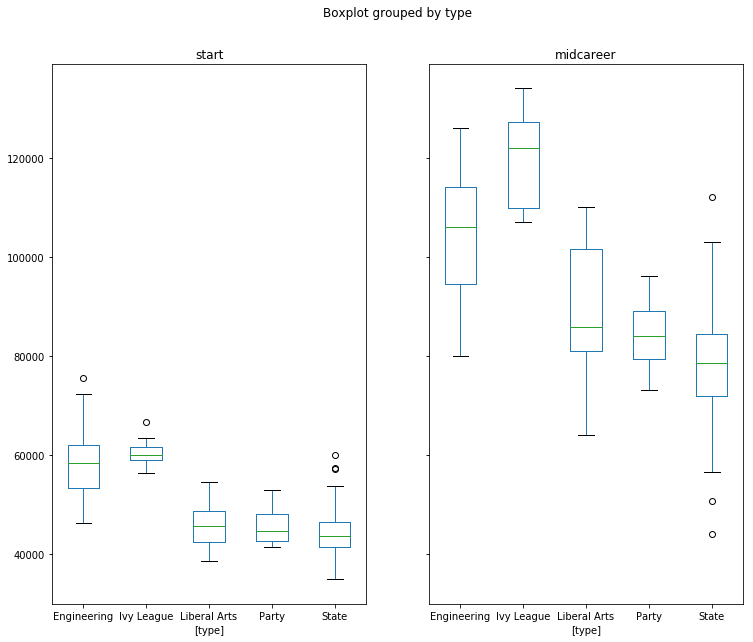

In [24]:
df_type.boxplot(column=['start','midcareer'], by=['type'],grid=False,figsize=(12,10))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000155F5269AC8>,
      dtype=object)

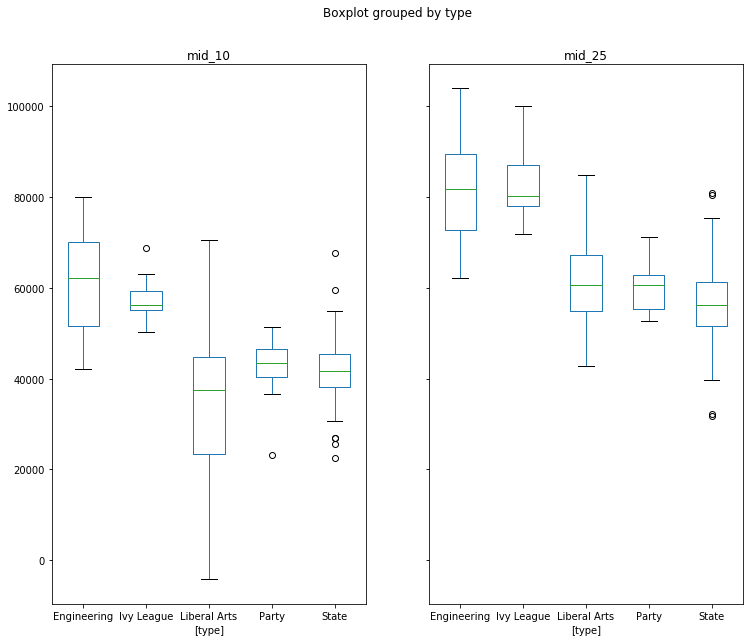

In [25]:
df_type.boxplot(column=['mid_10','mid_25'], by=['type'],grid=False,figsize=(12,10))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000155F5226390>,
      dtype=object)

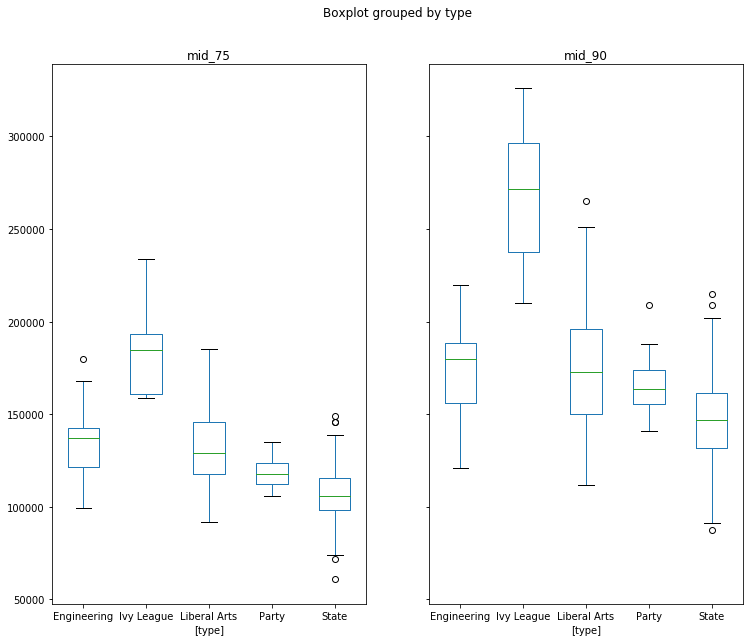

In [26]:
df_type.boxplot(column=['mid_75','mid_90'], by=['type'],grid=False,figsize=(12,10))

In [27]:
# Next, we will compare mean salaries amount all school types.

x = ['Start','MidCareer','MidCareer 10th Percentile','MidCareer 25th Percentile','MidCareer 75th Percentile','MidCareer 90th Percentile']

fig = go.Figure(data=[
    go.Bar(name='State', x=x, y=df_state.mean()),
    go.Bar(name='Liberal Arts', x=x, y=df_LA.mean()),
    go.Bar(name='party', x=x, y=df_party.mean()),
    go.Bar(name='Engineering', x=x, y=df_eng.mean()),
    go.Bar(name='Ivy League', x=x, y=df_IL.mean())
])

fig.update_layout(barmode='group')
fig.show()

According to above box plots and bar plot, it shows that the starting salaries for state, Liberal Arts, and Party schools are very similar. Engineering and Ivy league schools have slightly higher starting salaries. However, going into mid career, state schools have the lowest median salary, where liberal arts and party schools have higher grow compare to state schools. Also at mid career, Ivy League schools have higher grow compare to engineering schools. Again, this is a good data set to explore the salaries amoung school types, but we don't know the sample size of the summaried data set, which could be potentially bias. 

### Salaries by Regions

In [28]:
# As usual, we need to inspect the data set.
df_region.head()

,School Name,Region,Starting Median Salary,Mid-Career Median Salary,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary
0,Stanford University,California,"$70,400.00","$129,000.00","$68,400.00","$93,100.00","$184,000.00","$257,000.00"
1,California Institute of Technology (CIT),California,"$75,500.00","$123,000.00",NaN,"$104,000.00","$161,000.00",NaN
2,Harvey Mudd College,California,"$71,800.00","$122,000.00",NaN,"$96,000.00","$180,000.00",NaN
3,"University of California, Berkeley",California,"$59,900.00","$112,000.00","$59,500.00","$81,000.00","$149,000.00","$201,000.00"
4,Occidental College,California,"$51,900.00","$105,000.00",NaN,"$54,800.00","$157,000.00",NaN


In [29]:
df_region.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320 entries, 0 to 319
Data columns (total 8 columns):
School Name                          320 non-null object
Region                               320 non-null object
Starting Median Salary               320 non-null object
Mid-Career Median Salary             320 non-null object
Mid-Career 10th Percentile Salary    273 non-null object
Mid-Career 25th Percentile Salary    320 non-null object
Mid-Career 75th Percentile Salary    320 non-null object
Mid-Career 90th Percentile Salary    273 non-null object
dtypes: object(8)
memory usage: 20.1+ KB


In [34]:
# According to above data set info, this data set is missing some 10th percentile and 90th percentile salaries data. Therefore, I will impute the data using the same method from previous data set.

# Change column name
df_region.columns = ['name', 'region', 'start', 'midcareer','mid_10','mid_25','mid_75','mid_90']

# Data Cleaning
clean_columns = ['start','midcareer','mid_10','mid_25','mid_75','mid_90']

for column in clean_columns:
    df_region[column] = df_region[column].str.replace('$','')
    df_region[column] = df_region[column].str.replace(',','')
    df_region[column] = pd.to_numeric(df_region[column])


AttributeError: Can only use .str accessor with string values, which use np.object_ dtype in pandas

In [31]:
# 10th Percentile

for i in range(len(df_region.mid_10)):
    if np.isnan(df_region.mid_10[i]) == True:
        df_region.mid_10[i] = float(nor_func(df_region.mid_25[i],df_region.mid_75[i])[0]) - 1.282 * float(nor_func(df_region.mid_25[i],df_region.mid_75[i])[1])

In [32]:
# 90th percentile

for i in range(len(df_region.mid_90)):
    if np.isnan(df_region.mid_90[i]) == True:
        df_region.mid_90[i] = float(nor_func(df_region.mid_25[i],df_region.mid_75[i])[0]) + 1.282 * float(nor_func(df_region.mid_25[i],df_region.mid_75[i])[1])

In [35]:
# Check data set again. 

df_region.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320 entries, 0 to 319
Data columns (total 8 columns):
name         320 non-null object
region       320 non-null object
start        320 non-null float64
midcareer    320 non-null float64
mid_10       320 non-null float64
mid_25       320 non-null float64
mid_75       320 non-null float64
mid_90       320 non-null float64
dtypes: float64(6), object(2)
memory usage: 20.1+ KB


In [36]:
# Check how many unique regions

df_region.region.unique()

array(['California', 'Western', 'Midwestern', 'Southern', 'Northeastern'],
      dtype=object)

In [37]:
# We will make a pie chart again to visualize the percentage of each region

region_count = np.unique(df_region.region, return_counts=True)

value = region_count[1]
label = region_count[0]

fig = go.Figure(data=[go.Pie(labels=label, values=value)])

fig.show()



array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000015580C52860>,
      dtype=object)

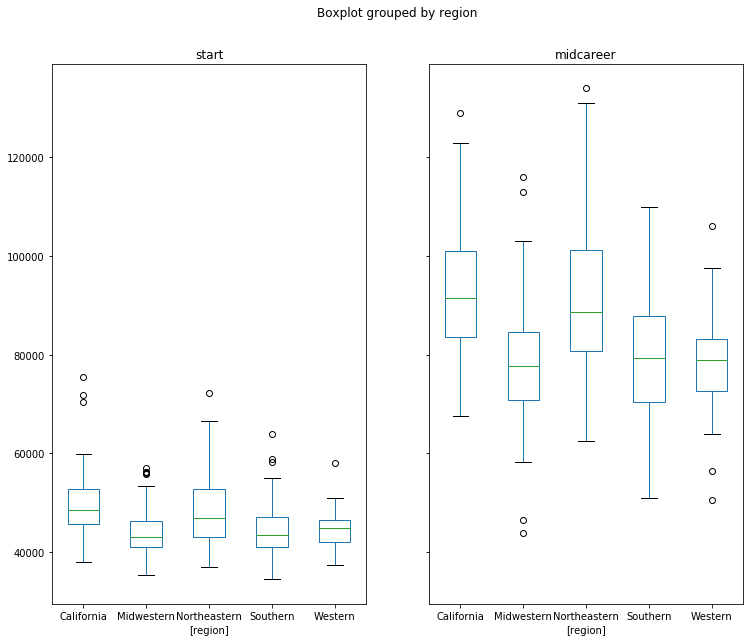

In [38]:
# Next, we are going to check out the differences between starting salaries and mid-career salaries for each region. 

df_region.boxplot(column=['start','midcareer'], by=['region'],grid=False,figsize=(12,10))

Accoridng to above box plots, it's interesting to see Southern region and Western region have similar salaries. Also, it's interesting to see California is standout as a region instead of including it in the Western region. In addition, it's not suprise that Calfornia and Northestern region standout both during starting of the career and mid career, becuase these two regions includes big cities like San Fransico, Los Ageles, San Jose, New York, Chicago, etc..

### End
The purpose of this notebook is to practice my skills using Plotly. As I mentioned previously, I do not have much experience using Plotly as data visualization tool during my studies at Thinkful. Therefore, I would like to practice it using a simple data set. Hope you enjoyed it. Thank you!